In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_play = pd.read_csv("D:/Spyder/Data-Envelopment-Analysis-Excel/Data/Play_store/googleplaystore.csv")

In [3]:
data_play

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#### Let's 1st make a copy so that we work on copy and let the main dataset remain intact

In [4]:
dataplay = data_play.copy(deep =True)

In [5]:
dataplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Basic Information Retrival

In [6]:
def basic_infos(data):
    print("Dataset shape is: ", data.shape,"\n")
    print("Dataset columns are: ",data.columns,"\n")
    print("Dataset dimensions are:",data.ndim,"\n")
    print("Dataset information is:\n",data.info(),"\n")
    categorical, numerical = [], []
    for i in data.columns:
        if dataplay[i].dtype==object:
            categorical.append(i)
        else:
            numerical.append(i)
    print("Categorical datatype columns are: ", [i for i in categorical],"\n")
    print("Numercial datatype columns are: ", [i for i in numerical],"\n")

In [7]:
basic_infos(dataplay)

Dataset shape is:  (10841, 13) 

Dataset columns are:  Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object') 

Dataset dimensions are: 2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833

##### We can see that many columns which can be numerical are categorical, and so as to make computation easy, we are gonna change the this

#### The columns which are gonna be changed are: Size, Price

# Feature Engineering

In [8]:
"""def replace_it(x):
    for i in x:
        if "M" in x:
            x = x.replace('M',"")
    try:
        int(x)
        return int(x)*10**6
    except ValueError:
        return int(float(x)*10**6)"""

'def replace_it(x):\n    for i in x:\n        if "M" in x:\n            x = x.replace(\'M\',"")\n    try:\n        int(x)\n        return int(x)*10**6\n    except ValueError:\n        return int(float(x)*10**6)'

Let's try changing again

#### Done with Reviews, lets see Size

In [9]:
dataplay['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

We can replace the values of k and M by their respctive values but let us keep Size as it is for now.

#### Let's go for price

In [10]:
dataplay['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

We have to do many refining task over here, we need to replace the dollar symbol $, We see that there's a value called 'Everyone', we can treat that "Everyone" here means its free as in sense no cost so we will equivalent it to 0, then at last all the strings have to be converted into their numeric values i.e., float64

In [11]:
def replace_in_in_price(price):
    if price == '0':
        price = 0
        return price
    elif '$' in price:
        price = price.replace("$","")
        return float(price)

In [12]:
dataplay['Price'] = dataplay["Price"].apply(lambda x: replace_in_in_price(x))

In [13]:
dataplay['Price'].dtype

dtype('float64')

In [14]:
dataplay['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

#### Type, Content Rating and Genre can be converted into dummy/one hot encode, but will ve done after General Exploration
#### For now we will convert the Last Updated into date-time format for easy continuing

In [15]:
dataplay['Last Updated'] = pd.to_datetime(dataplay['Last Updated'])

In [16]:
dataplay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10841 non-null  int64         
 4   Size            10841 non-null  object        
 5   Installs        10841 non-null  object        
 6   Type            10840 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10841 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10839 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 1.1+ MB


In [17]:
dataplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


### Let's see about Nan values

In [18]:
print(dataplay.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


Rating is a numercial column so we will look into boxplot of its so as to get the informations about outliers. Type and Android Ver are Categorical so we will use **MODE** as **Fillna()** for them 

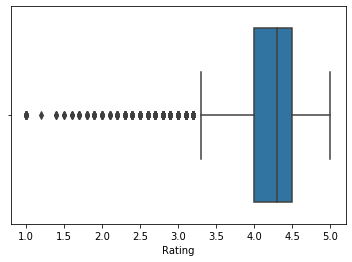

In [19]:
sns.boxplot(dataplay['Rating'])

We can see that there's some outliers, so for now in this case using **Median** as way for **Fillna()** is a better choice

In [20]:
dataplay["Rating"] = dataplay['Rating'].fillna(dataplay['Rating'].median())

Using **Mode** for Type and Android Ver

In [21]:
dataplay['Type'] = dataplay['Type'].fillna(dataplay['Type'].mode()[0])

In [22]:
dataplay['Android Ver'] = dataplay['Android Ver'].fillna(dataplay['Android Ver'].mode()[0])

In [23]:
dataplay.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       0
dtype: int64

In [24]:
dataplay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  int64         
 4   Size            10841 non-null  object        
 5   Installs        10841 non-null  object        
 6   Type            10841 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10841 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10841 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 1.1+ MB


Now lets go for General Exploration

# General Exploration

#### 1. Let's explore the Category

In [25]:
dataplay['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               383
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

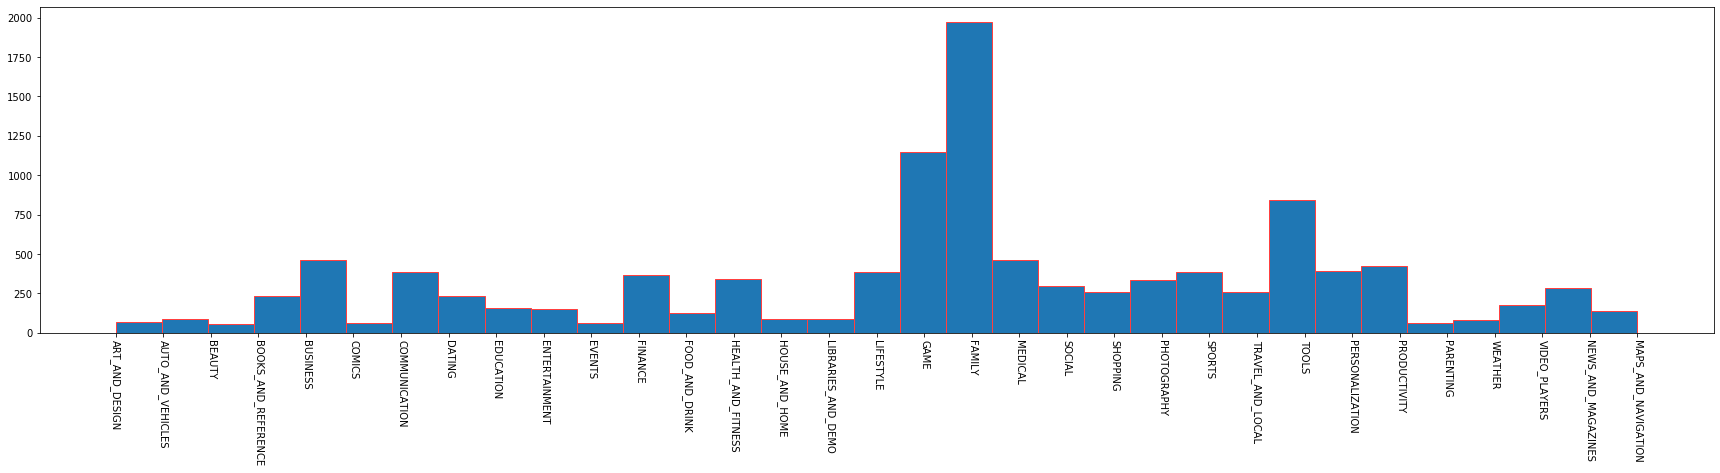

In [26]:
plt.figure(figsize=(30,6))
plt.hist(dataplay['Category'], bins = len(dataplay['Category'].value_counts()), edgecolor="#FF4040")
plt.xticks(rotation=-90)
plt.show()

Let's see the same in the form of a pie chart

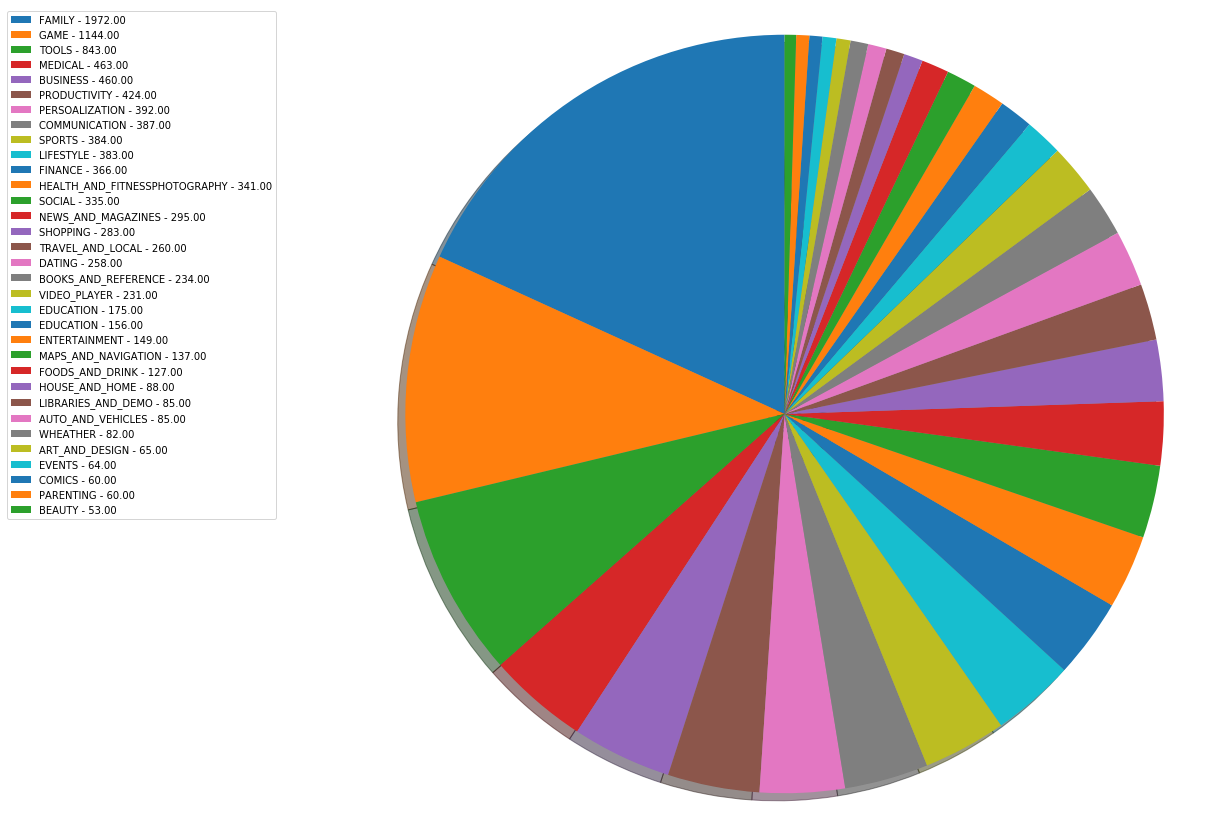

In [27]:
#plt.figure(figsize=(100,80))
labels=['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'BUSINESS', 'PRODUCTIVITY',\
       'PERSOALIZATION', 'COMMUNICATION', 'SPORTS', 'LIFESTYLE', 'FINANCE', 'HEALTH_AND_FITNESS'\
       'PHOTOGRAPHY', 'SOCIAL', 'NEWS_AND_MAGAZINES', 'SHOPPING', 'TRAVEL_AND_LOCAL', 'DATING', 'BOOKS_AND_REFERENCE', 'VIDEO_PLAYER',\
       'EDUCATION', 'EDUCATION', 'ENTERTAINMENT', 'MAPS_AND_NAVIGATION', 'FOODS_AND_DRINK', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'AUTO_AND_VEHICLES',\
       'WHEATHER', 'ART_AND_DESIGN', 'EVENTS', 'COMICS', 'PARENTING', 'BEAUTY']
sizes = dataplay['Category'].value_counts()
fig, ax=plt.subplots()

patches, texts = ax.pie(sizes,shadow=True, startangle=90)

labels = ['{0} - {1:1.2f}'.format(i,j) for i, j in zip(labels,sizes)]
sort_legend = False

plt.legend(patches, labels, loc= 'best', bbox_to_anchor=(-0.1, 1.), fontsize = 10)
ax.axis('equal')
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.show()

### Hense the popular category is FAMILY

#### 2. Lets explore Rating

In [28]:
dataplay['Rating'].value_counts()

4.3    2550
4.4    1109
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.6      25
2.7      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      14
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [29]:
dataplay['Rating'].value_counts().index.tolist() # for labels

[4.3,
 4.4,
 4.5,
 4.2,
 4.6,
 4.1,
 4.0,
 4.7,
 3.9,
 3.8,
 5.0,
 3.7,
 4.8,
 3.6,
 3.5,
 3.4,
 3.3,
 4.9,
 3.0,
 3.1,
 3.2,
 2.9,
 2.8,
 2.6,
 2.7,
 2.5,
 2.3,
 2.4,
 1.0,
 2.2,
 1.9,
 2.0,
 1.7,
 2.1,
 1.8,
 1.6,
 1.4,
 1.5,
 1.2]

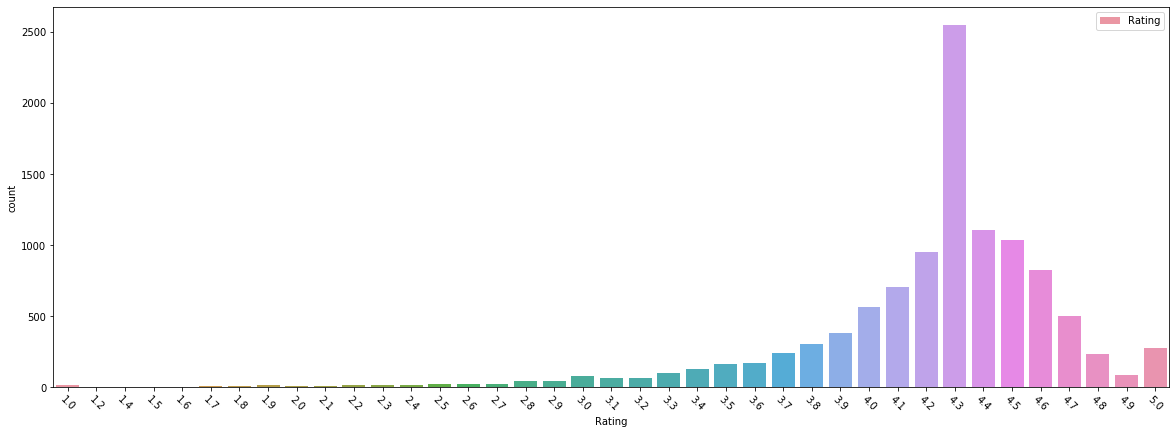

In [30]:
plt.figure(figsize=(20,7))
sns.countplot(dataplay['Rating'], label = "Rating")
plt.legend(loc= 'best')
plt.xticks(rotation= -45)
plt.show()

Lets make a treemap to see this a litte more

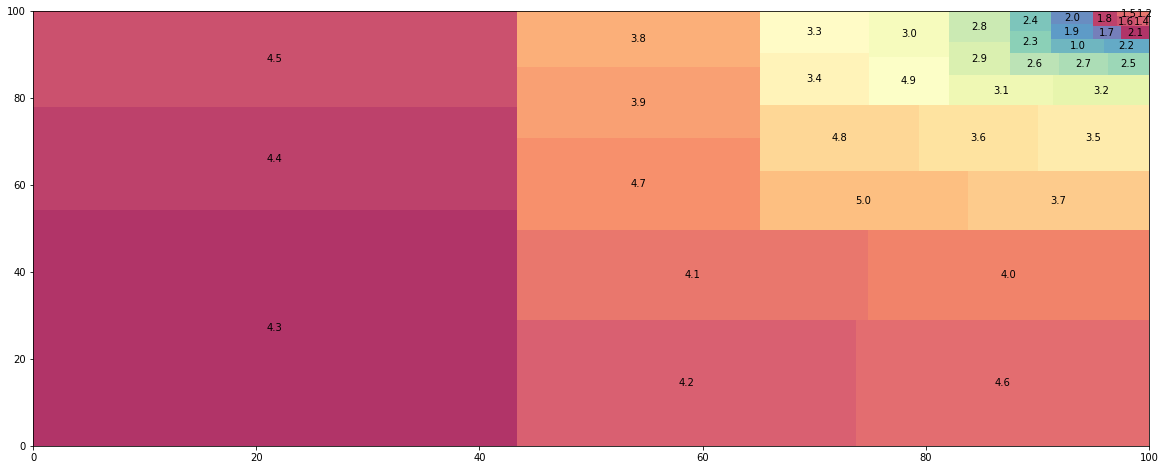

In [31]:
import squarify #for making treemap, we need squarify
plt.figure(figsize=(20,8))
label = dataplay['Rating'].value_counts().index.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
squarify.plot(sizes = dataplay['Rating'].value_counts(), label = label, color = colors, alpha = 0.8)

##### From both bar plots and treemap, we can see that most of the apps had 4.3 as rating and 1.2 as least

In [32]:
dataplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


### Let's looks what we can retirve from Size

In [33]:
dataplay['Size'].value_counts() 

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
103k                     1
695k                     1
259k                     1
953k                     1
288k                     1
Name: Size, Length: 461, dtype: int64

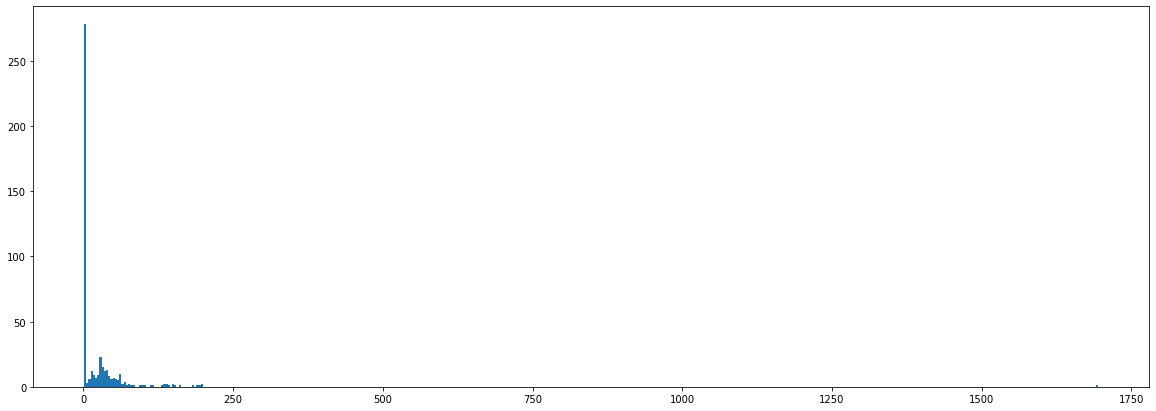

In [34]:
plt.figure(figsize=(20,7))
plt.hist(dataplay['Size'].value_counts(), bins = len(dataplay['Size'].value_counts()))
plt.show()

#### Lets look what we can see and learn from Installs

In [35]:
dataplay['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
1000+                1
Name: Installs, dtype: int64

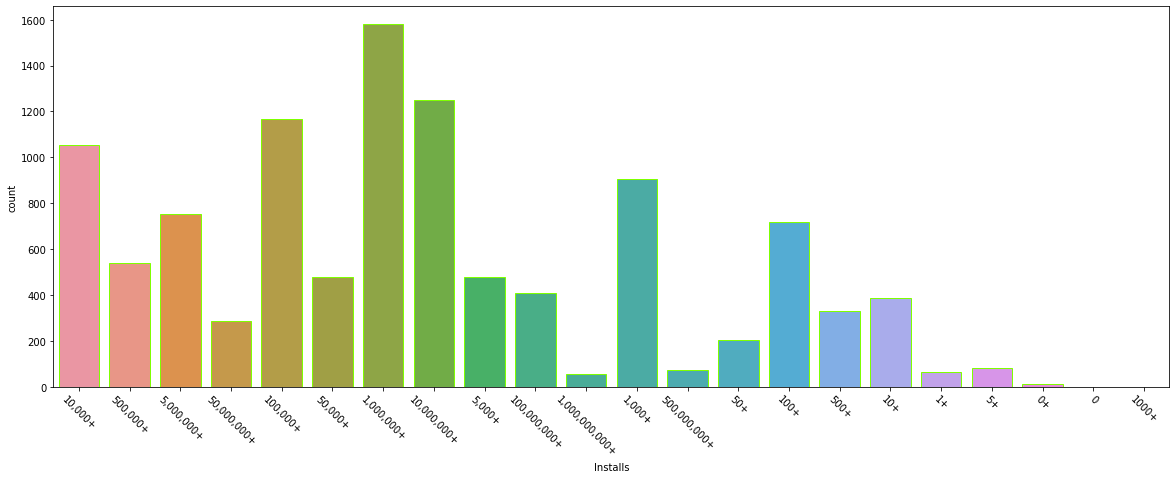

In [36]:
plt.figure(figsize=(20,7))
sns.countplot(dataplay['Installs'], edgecolor = "#7FFF00")
plt.xticks(rotation = -45)
plt.show()

We get that most apps installed were 1,000,000+

#### Lets explore Price

In [37]:
dataplay['Price'].value_counts()

0.00    10041
0.99      148
2.99      129
1.99       73
4.99       72
        ...  
1.20        1
1.59        1
2.56        1
1.61        1
1.04        1
Name: Price, Length: 92, dtype: int64

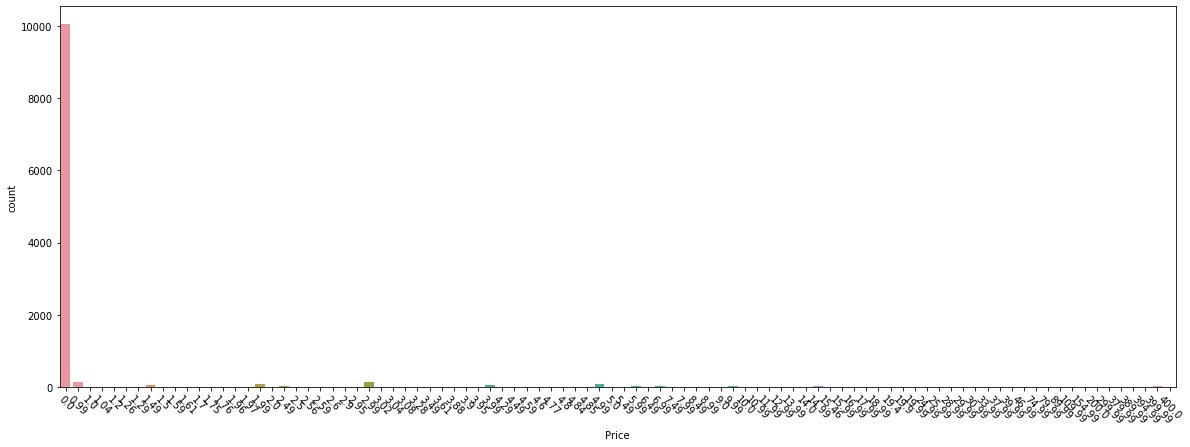

In [38]:
plt.figure(figsize=(20,7))
sns.countplot(dataplay['Price'], label= "price")
plt.xticks(rotation=-45)
plt.show()

For better representation, we will use donut chart 

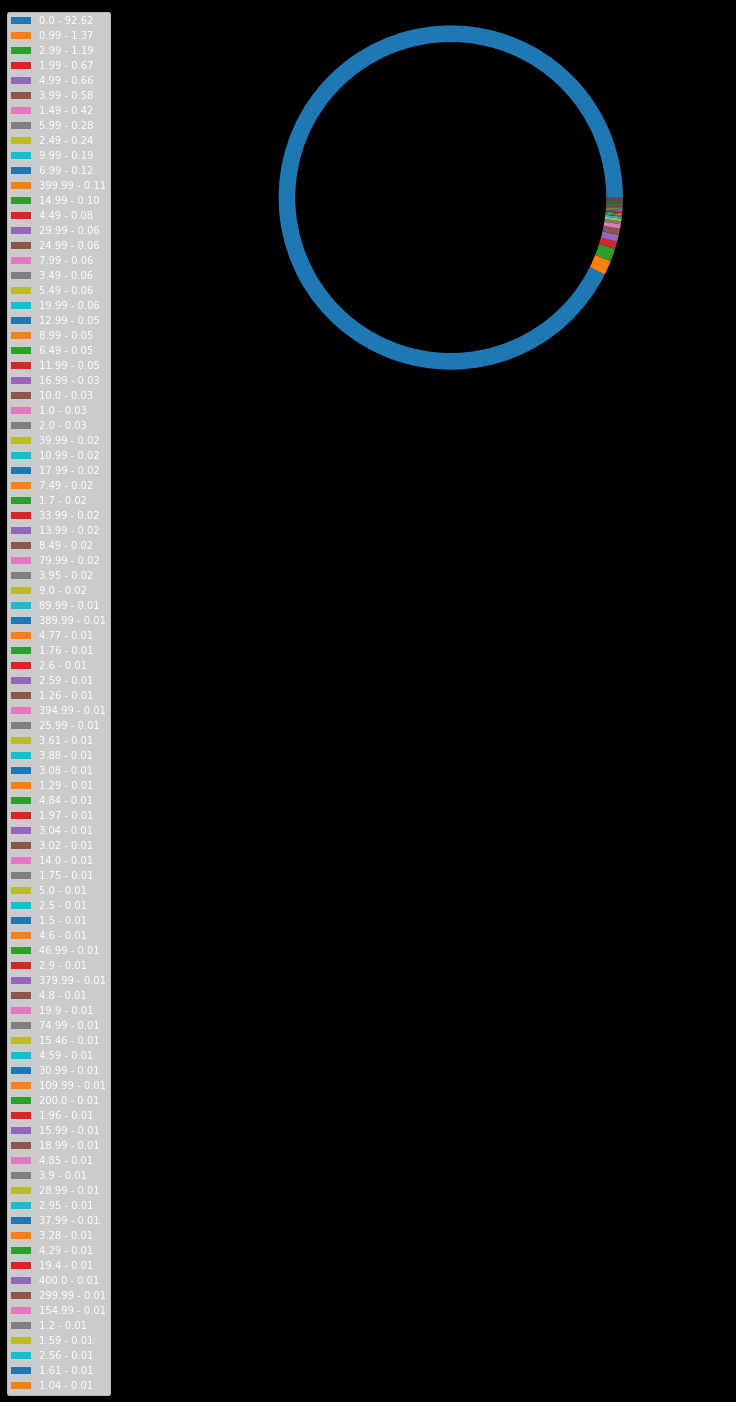

In [39]:
fig, ax1 = plt.subplots(figsize= (10,7))
fig.patch.set_facecolor('black') # For background
plt.rcParams['text.color'] = 'white' # for changing the text color
lables = dataplay['Price'].value_counts().index.to_list()
size = dataplay['Price'].value_counts()
my_circle = plt.Circle((0,0), 0.9, color = 'black') # for making the circle
percent = 100*np.array(size)/np.array(size).sum() #to show % of every category

#theme = plt.get_cmap('hsv')
#ax1.set_prop_cycle("color", [theme(1. *i / len(size)) for i in range(len(size))])

patches, text = ax1.pie(size) # Making the pie chart

labels = ['{0} - {1:1.2f}'.format(i,j) for i, j in zip(lables,percent)]
sort_legend = False
ax1.axis('equal')

plt.legend(patches, labels, loc= 'best', bbox_to_anchor=(-0.1, 1.), fontsize = 10)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

We see that most of the apps are free

#### lets explore Content Rating

In [40]:
dataplay['Content Rating'].value_counts()

Everyone           8715
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

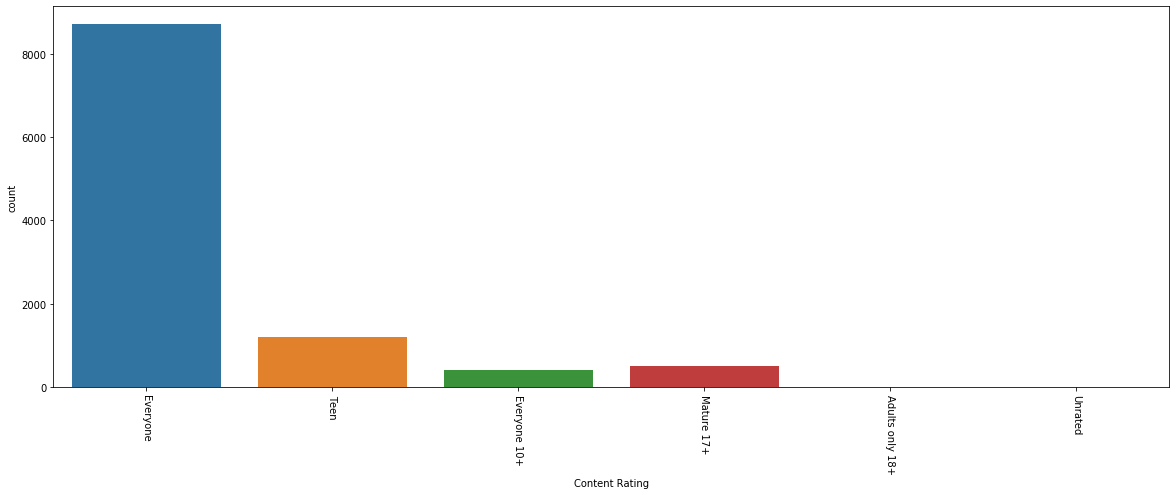

In [41]:
plt.figure(figsize=(20,7))
sns.countplot(dataplay['Content Rating'])
plt.xticks(rotation=-90)
plt.show()

Pie chart representation fo the same

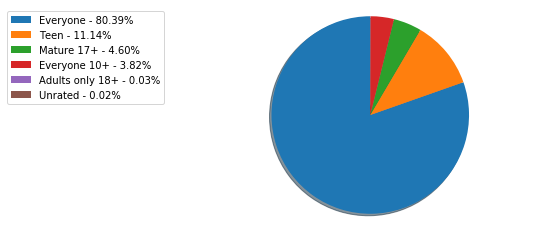

In [42]:
fig, ax=plt.subplots()
plt.rcParams['text.color'] = 'black'
labels = dataplay['Content Rating'].value_counts().index.to_list()
sizes = dataplay['Content Rating'].value_counts()
percent = 100*np.array(sizes)/np.array(sizes).sum() #to show % of every category
patches, texts = ax.pie(sizes, shadow=True, startangle=90)
labels = ['{0} - {1:1.2f}%'.format(i,j) for i, j in zip(labels,percent)]
sort_legend = False
ax1.axis('equal')

plt.legend(patches, labels, loc= 'best', bbox_to_anchor=(-0.1, 1.), fontsize = 10)
ax.axis('equal')
plt.show()

#### Lets explore Genres

In [43]:
dataplay['Genres'].value_counts()

Tools                                842
Entertainment                        623
Education                            549
Medical                              463
Business                             460
                                    ... 
Travel & Local;Action & Adventure      1
Trivia;Education                       1
Strategy;Education                     1
Adventure;Brain Games                  1
Puzzle;Education                       1
Name: Genres, Length: 119, dtype: int64

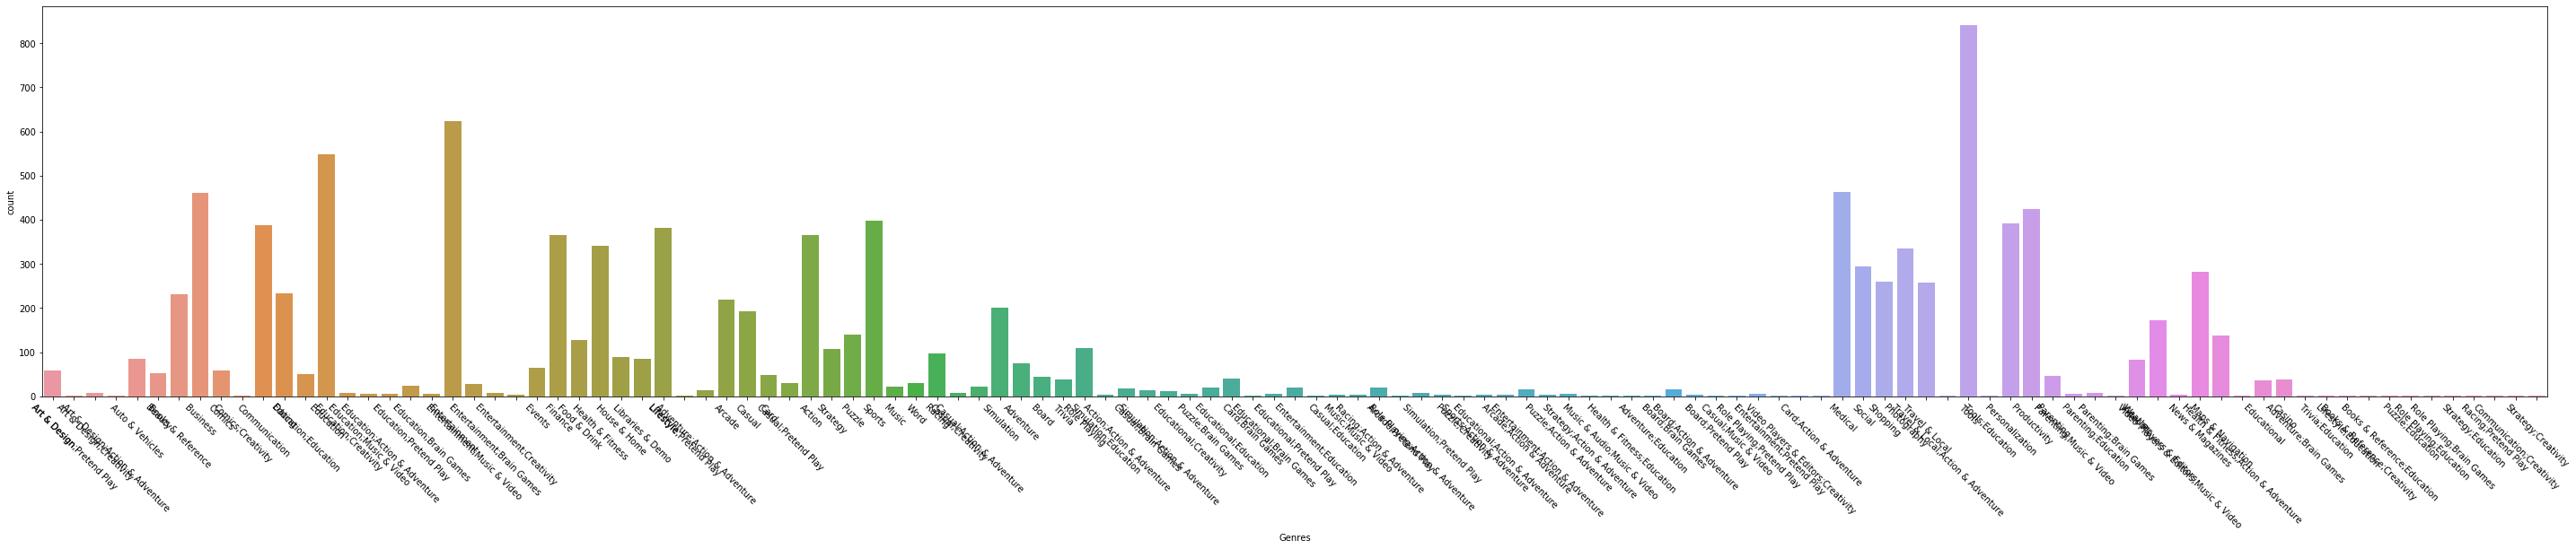

In [44]:
plt.figure(figsize=(50,8))
sns.countplot(dataplay['Genres'])
plt.xticks(rotation = -45)
plt.show()

I know its a pretty messed up but still i just wanted to show...

##### We are just gonna see the values of Current Ver & Android Ver

In [45]:
dataplay['Current Ver'].value_counts()

Varies with device    1459
1                      842
1.1                    276
1.2                    185
2                      165
                      ... 
1.0060.b0060             1
2.41                     1
1.00.02                  1
1.3.35                   1
2.277.0                  1
Name: Current Ver, Length: 2783, dtype: int64

In [46]:
dataplay['Android Ver'].value_counts()

4.1 and up            2453
4.0.3 and up          1501
4.0 and up            1376
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0 and up               2
4.1 - 7.1.1              1
7.0 - 7.1.1              1
5.0 - 7.1.1              1
2.2 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

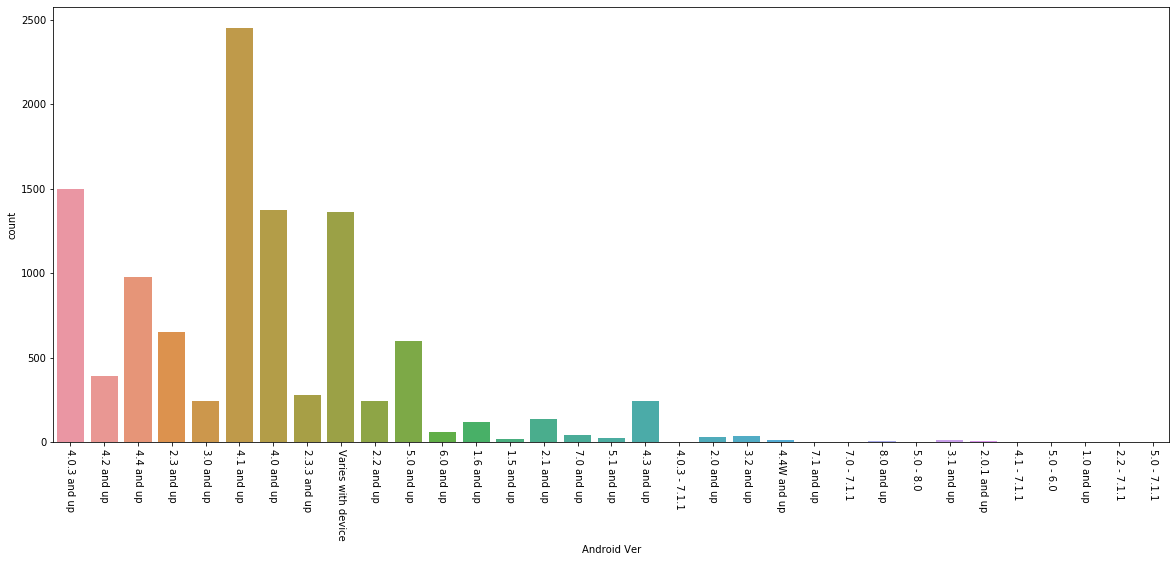

In [47]:
plt.figure(figsize=(20,8))
sns.countplot(dataplay['Android Ver'])
plt.xticks(rotation = -90)
plt.show()

#### We can see that most of the apps had versions 4.1 and up

In [48]:
dataplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


### Now we are done with General Exploration, we are gonna make data more good and flexible so that further programming/ analysis is flexible
#### This will include categorical variable being changed into sparse form (either by dummy or one hot encoding) or numerical form
#### Working on the outliers in Rating

# Further Enhancing & Corrections or Changes

#### Lets see the Rating again

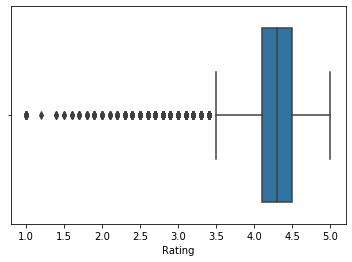

In [49]:
sns.boxplot(dataplay['Rating'])

After going through a bunch of stuff like online articles and stuff, I found out that there's always been debate whether to keep the outliers/ exclude the outliers

As much as I understood, the main scenario to remove the outliers should be when **It's an expermintal faulty value or a wrong value**. On the other hand outliers may show **something scientifically interesting**

Keeping in 1st point, ratings can't be a wrong value, since a user gives rating because of its UX. So for my analysis, I am not gonna remove the outliers.

### Size and Installs are gonna be changed into numerical form

In [50]:
def change_sixe(d):
    if "M" in d:
        d = d.replace("M","")
        try:
            d = int(d)*10**6
            return d
        except ValueError:
            d = int(float(d)*10**6)
            return d
    elif "k" in d:
        d = d.replace("k","")
        try:
            d = int(d)*1000
            return d
        except ValueError:
            d = int(float(d)*1000)
            return d
    else:
        d = 0
        return d
# M being changed to 10**6 and k being changed to 1000. First these letters are being replaced by empty character and then the coversation is done
# Direct coverstion to int cannot happen as as many strings after removal of M or k will be of float type, that's why try-except is used for handling
# We are having many apps with size value as Varies with device, and for our computation we are taking it to be 0

In [51]:
# lets try to apply and get to see if things are going right
dataplay['Size'] = dataplay['Size'].apply( lambda x: change_sixe(x))

In [52]:
dataplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [53]:
# Function to remoce , and + from Installs
def remove_plus_and_comma(x):
    x = x.replace(",","")
    x = x.replace("+","")
    return int(x)

In [54]:
dataplay['Installs'] = dataplay['Installs'].apply(lambda x: remove_plus_and_comma(x))

In [55]:
dataplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


### Lets work on our categorical values: Category, Type, Content Rating, Genre

##### Category:

In [56]:
dummy_C = pd.get_dummies(dataplay['Category'])
del dummy_C[dummy_C.columns[-1]]#To avoid dummy variable trap
dataplay = pd.concat([dataplay , dummy_C], axis = 1)

In [57]:
dataplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,...,0,0,0,0,0,0,0,0,0,0


In [58]:
dummy_T = pd.get_dummies(dataplay['Type'])
del dummy_T[dummy_T.columns[-1]]#To avoid dummy variable trap
dataplay = pd.concat([dataplay, dummy_T], axis = 1)

In [59]:
dataplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,Free
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,0,0,0,0,0,0,0,0,0,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,...,0,0,0,0,0,0,0,0,0,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,...,0,0,0,0,0,0,0,0,0,1


In [60]:
#dummy_CR = pd.get_dummies([dataplay["Content Rating"]])
#dataplay = pd.concat([dataplay, dummy_CR], axis = 1)
dummy_G = pd.get_dummies(dataplay["Genres"])
del dummy_G[dummy_G.columns[-1]]#To avoid dummy variable trap
dataplay = pd.concat([dataplay, dummy_G], axis = 1)

In [61]:
dataplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Tools,Tools;Education,Travel & Local,Travel & Local;Action & Adventure,Trivia,Trivia;Education,Video Players & Editors,Video Players & Editors;Creativity,Video Players & Editors;Music & Video,Weather
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,...,0,0,0,0,0,0,0,0,0,0


In [62]:
dummy = pd.get_dummies(dataplay['Content Rating'])
del dummy[dummy.columns[-1]]
dataplay = pd.concat([dataplay, dummy], axis = 1)

# Model Making

#### Due to mutable error which I wasn't able to tackle with, I will not be using Content Rating as one of the category for model making
#### Now I will make a new dataset which will have only numeric values which will be used for making models

In [63]:
datamodel = dataplay.drop(["Category", "Type", "Content Rating", "Genres", "App", "Last Updated", "Current Ver", "Android Ver"], axis =1)

In [64]:
datamodel

,Rating,Reviews,Size,Installs,Price,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,...,Trivia;Education,Video Players & Editors,Video Players & Editors;Creativity,Video Players & Editors;Music & Video,Weather,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen
0,4.1,159,19000000,10000,0.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,3.9,967,14000000,500000,0.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,4.7,87510,8700000,5000000,0.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4.5,215644,25000000,50000000,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4.3,967,2800000,100000,0.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,4.5,38,53000000,5000,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10837,5.0,4,3600000,100,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10838,4.3,3,9500000,1000,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10839,4.5,114,0,1000,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


### Our task is to predict the rating so this task is a regression task. We will try to use
#### Linear Regression, Support Vector Regression

Lets split our data

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X = datamodel.loc[:, datamodel.columns != "Rating"]

In [67]:
y = datamodel['Rating']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

#### Let's make the linear model

In [1]:
from sklearn.linear_model import LinearRegression

In [70]:
lr = LinearRegression()

In [71]:
model = lr.fit(X_train, y_train)

In [72]:
y_predict = model.predict(X_test)

In [73]:
y_predict

array([4.16444311, 4.1304944 , 4.28767842, ..., 4.18492275, 4.16668494,
       4.1350108 ])

In [74]:
predict_dataframe = pd.DataFrame(data={"Predicted": y_predict, "Actual": y_test})

In [75]:
predict_dataframe

,Predicted,Actual
212,4.164443,4.1
6547,4.130494,4.4
2378,4.287678,4.5
5744,4.073981,4.2
3793,4.164898,4.2
...,...,...
4965,4.203828,4.3
3001,4.243882,3.3
2811,4.184923,4.7
3777,4.166685,3.9


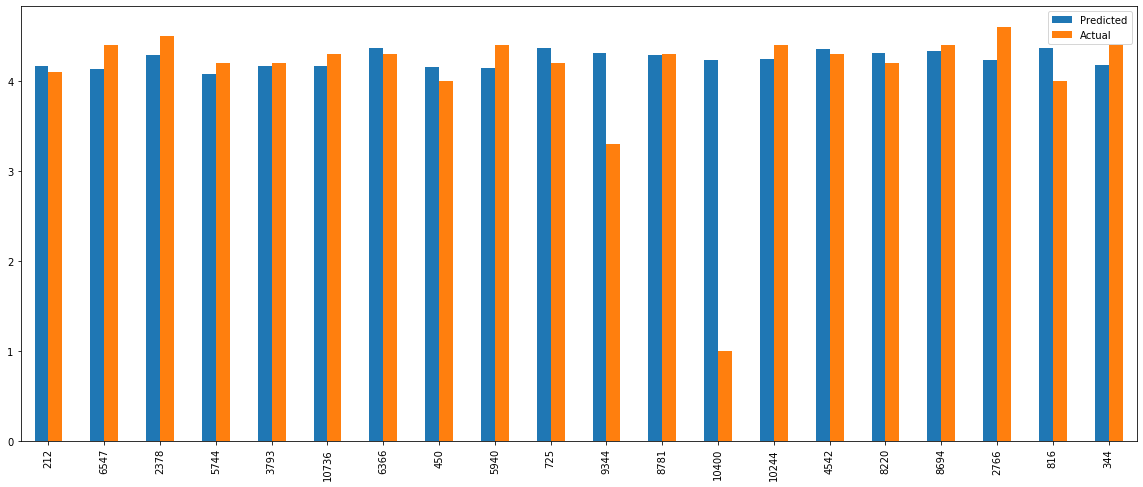

In [76]:
predict_dataframe[:20].plot(kind = "bar", figsize = (20,8))

In [77]:
model.score(X_test, y_test)

0.04120741846597609

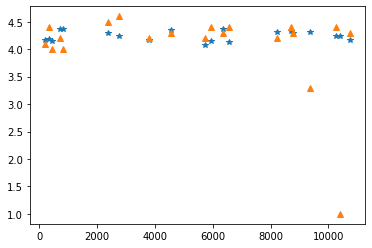

In [78]:
plt.plot(predict_dataframe["Predicted"][:20], "*")
plt.plot(predict_dataframe['Actual'][:20], "^")
plt.show()

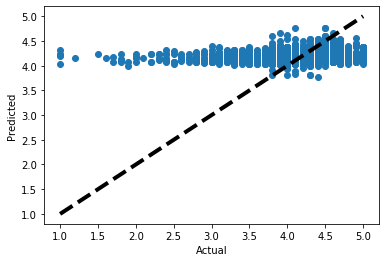

In [94]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw = 4 )
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
plt.show()

#### Lets try Ridge regression

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [96]:
ridge = Ridge()

In [97]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv =5)

In [98]:
modelR = ridge_regressor.fit(X_train, y_train)

C:\Users\SHIVLEON\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.33821e-30): result may not be accurate.
  overwrite_a=True).T
C:\Users\SHIVLEON\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.12381e-30): result may not be accurate.
  overwrite_a=True).T
C:\Users\SHIVLEON\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.14331e-30): result may not be accurate.
  overwrite_a=True).T
C:\Users\SHIVLEON\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.28298e-30): result may not be accurate.
  overwrite_a=True).T
C:\Users\SHIVLEON\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.3319e-30): result may not be accurate.
  overwrite_a=True).T
C:\Users\SHIVLEON\Anaconda3\lib\site-packages\

C:\Users\SHIVLEON\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.65973e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\SHIVLEON\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.2173e-20): result may not be accurate.
  overwrite_a=True).T


In [99]:
y_predict_R = modelR.predict(X_test)

In [100]:
rigid_df = pd.DataFrame(data = {"Predicted": y_predict_R, "Actual": y_test})

In [101]:
rigid_df

,Predicted,Actual
212,4.165466,4.1
6547,4.196492,4.4
2378,4.288371,4.5
5744,4.075125,4.2
3793,4.166806,4.2
...,...,...
4965,4.203587,4.3
3001,4.244058,3.3
2811,4.186237,4.7
3777,4.169310,3.9


In [102]:
modelR.score(X_test, y_test)

-0.21546975953017108

#### Lets try Support Vector Regression

In [111]:
from sklearn.svm import SVR

In [112]:
svr = SVR()

In [113]:
model_svr = svr.fit(X_train, y_train)

In [114]:
y_predict_svr = model_svr.predict(X_test)

In [115]:
svr_df = pd.DataFrame(data = {"Predicted": y_predict_svr, "Actual": y_test})

In [116]:
svr_df

,Predicted,Actual
212,4.229795,4.1
6547,4.219119,4.4
2378,4.215371,4.5
5744,4.207358,4.2
3793,4.231281,4.2
...,...,...
4965,4.219344,4.3
3001,4.201263,3.3
2811,4.319317,4.7
3777,4.316339,3.9


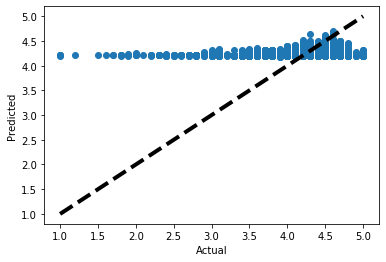

In [117]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict_svr)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw = 4 )
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
plt.show()

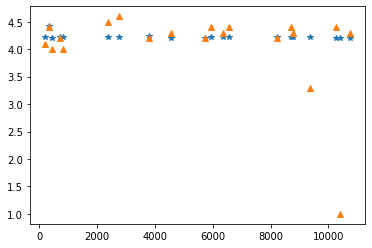

In [118]:
plt.plot(svr_df["Predicted"][:20], "*")
plt.plot(svr_df['Actual'][:20], "^")
plt.show()

In [119]:
model_svr.score(X_test, y_test)

0.018642057134597767

#### Lets make Random Forest Regresor

In [120]:
from sklearn.ensemble import RandomForestRegressor

In [121]:
rfr = RandomForestRegressor()

In [122]:
modef_rfr = rfr.fit(X_train, y_train)

In [123]:
y_predict_rfr = modef_rfr.predict(X_test)

In [124]:
rfr_df = pd.DataFrame(data={"Predicted": y_predict_rfr, "Actual": y_test})

In [125]:
rfr_df

,Predicted,Actual
212,4.030,4.1
6547,4.553,4.4
2378,4.369,4.5
5744,3.854,4.2
3793,4.495,4.2
...,...,...
4965,4.534,4.3
3001,3.874,3.3
2811,4.398,4.7
3777,4.199,3.9


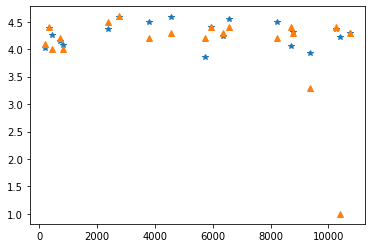

In [126]:
plt.plot(rfr_df["Predicted"][:20], "*")
plt.plot(rfr_df['Actual'][:20], "^")
plt.show()

In [127]:
modef_rfr.score(X_test, y_test)

0.1406327467257924

# Model Scores and Conclusion

In [128]:
print("Linear Regression Score: ", model.score(X_test, y_test))
print("Rigid Regression Score: ", modelR.score(X_test, y_test))
print("Support Vector Regression Score: ", model_svr.score(X_test, y_test))
print("Random Forest Regressor Score: ", modef_rfr.score(X_test, y_test))

Linear Regression Score:  0.04120741846597609
Rigid Regression Score:  -0.21546975953017108
Support Vector Regression Score:  0.018642057134597767
Random Forest Regressor Score:  0.1406327467257924


Out of 4 models I made, the best socre I got was from Random Forest Regressor and then Linear Regression. The socres might have been different if I had **removed the outliers**. But that's a different story.